## Random Forest

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where we join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

### Random Forest Algorithm 

The following are the basic steps involved in performing the random forest algorithm:  
1.Pick N random records from the dataset.  
2.Build a decision tree based on these N records.    
3.Choose the number of trees you want in your algorithm and repeat steps 1 and 2.  
4.In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg" alt="Drawing" style="height: 300px;"/>

### Using Random Forest for Regression

We have to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), income (dollars) and the proportion of population with the driving license.

In [105]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Petrol_consumption.csv')
dataset.head()

,City,Petrol_tax,Income,Prop_drivers_licenses,Consum_mill_gallons
0,1,7.918,3571,0.551,541
1,2,7.952,4092,0.534,524
2,3,7.878,3865,0.563,561
3,4,6.672,4870,0.415,414
4,5,7.180,4399,0.416,410


In [106]:
dataset.describe()

,City,Petrol_tax,Income,Prop_drivers_licenses,Consum_mill_gallons
count,48.00,48.000000,48.000000,48.000000,48.000000
mean,24.50,6.400208,4241.833333,0.632229,576.770833
std,14.00,1.463582,573.623768,0.146151,111.885816
min,1.00,2.572000,3063.000000,0.352000,344.000000
25%,12.75,5.769000,3739.000000,0.524500,509.500000
50%,24.50,6.756000,4298.000000,0.609500,568.500000
75%,36.25,7.389500,4578.750000,0.744000,632.750000
max,48.00,9.086000,5342.000000,0.930000,968.000000


The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

In [107]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [108]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

As we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem.

In [109]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs.

In [110]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42.443333333333335
Mean Squared Error: 3184.298833333333
Root Mean Squared Error: 56.4295918232033


With 20 trees, the root mean squared error is 56.42 which is about 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

### Using Random Forest for Classification

Let's first load the Pima Indian Diabetes dataset using pandas' read CSV function.

In [82]:
# Load libraries
import pandas as pd
import numpy as np
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
#split dataset in features and target variable
X = pima.iloc[:, 0:8].values #features variable
y = pima.iloc[:, 8].values   #target variable

# Split dataset into training set and test set
# 70% training and 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now that we have scaled our dataset, we can train our random forests to solve this classification problem.

For classification, we will use RandomForestClassifier class of the sklearn.ensemble library. RandomForestClassifier class also takes n_estimators as a parameter. Like before, this parameter defines the number of trees in our random forest. We will start with 20 trees again.

In [99]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values.

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7532467532467533
[[137  20]
 [ 37  37]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.65      0.50      0.56        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



The accuracy achieved for by our random forest classifier with 20 trees is 75.32%. Changing the number of estimators can significantly improve the results.

### Hyperparameter Tuning

Random Forests, however, are more than just bagged trees and use a number of interesting techniques to further decrease correlation between trees and reduce overfitting. A quick look at the documentation for scikit-learn’s implementation of the RandomForestRegressor shows us the hyperparameters we can pass in:

_class sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False_

Here we take a closer look what _n_estimators, max_depth, min_samples_leaf,_ and _max_features_ do and why each of them could potentially decrease the error of our model.

##### n_estimators

_n_estimators_ is simply the number of trees. The more uncorrelated trees in our forest, the closer their individual errors get to averaging out. However, more is not always better and here are some considerations to keep in mind:  
1.More trees = more computation. Beyond a certain point, the tradeoff may not be worth it.  
2.Increasing n_estimators gives diminishing returns.  
3.No number of uncorrelated trees will get rid of error caused by the assumptions made by your model or bias resulting from unrepresentative training data.

##### max_depth

_max_depth_ is the how many splits deep we want each tree to go. _max_depth_ = 50, for example, would limit trees to at most 50 splits down any given branch.  
This has the consequence that our Random Forest can no more fit the training data as closely, and is consequently more stable. It has lower variance, giving our model lower error. Remember that even though severely constraining _max_depth_ could increase the bias of each tree given that they may not be able to capture certain patterns in the data before hitting their limit, we need not worry about this. A suitable choice of n_estimators, coupled with bagging, ensures that the bias of the forest as a whole doesn’t increase in the process.

##### min_samples_leaf

_min_samples_leaf_ tells each tree to stop splitting if doing so would result in the end node of any resulting branch having less than required leaves. _min_samples_leaf_ = 10, for example, tells each tree to stop splitting if doing so would result in the end node of any resulting branch having less than 10 leaves.  

##### max_features

_max_features_ tells each tree how many features to check when looking for the best split to make. A subtlety here is that passing in _max_features_ = 15 doesn’t mean that each tree picks some subset of 15 features to model. Rather, an individual tree chooses a different random sample of 15 features for each split. Like _min_samples_leaf_, this doesn’t allow a tree to fit too closely to the data. More importantly, the trees in the Random Forest are now even less correlated with one another since they weren’t even trained on the same data. There has been some practical machine learning research showing that forests of less accurate, less correlated trees perform better than forests of more accurate, more correlated trees.

### Important Features Selection

Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help us choose the most important features and drop the least important ones for model building. 

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables. 

In [102]:
feature_imp = pd.Series(classifier.feature_importances_ , index = col_names[0:8]).sort_values(ascending=False)
feature_imp

glucose     0.235223
bmi         0.174842
age         0.160977
pedigree    0.123695
bp          0.080483
skin        0.080468
pregnant    0.075491
insulin     0.068821
dtype: float64

We can also visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, you can use a combination of matplotlib and seaborn:

No handles with labels found to put in legend.


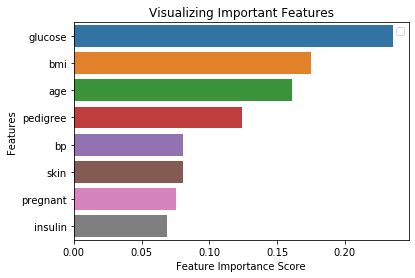

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

We can generate model after removing the least important features and the accuracy will increase. This is because we removed misleading data and noise, resulting in an increased accuracy. A lesser amount of features also reduces the training time.

**_Advantages_**:  
•Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.  
•It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.  
•The algorithm can be used in both classification and regression problems.  
•Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.  
•We can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

**_Disadvantages_**:  
•Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.   
•The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

#### Questionnaire

##### Do Random Forest overfit?
##### Show effect of Random Forest hyperparameter tuning on performance in python


[Solution](https://github.com/ebi-byte/kt/blob/master/trees/Trees%20Questionnaire.ipynb)